# Homework 4

## ChenGengyang here

Instructions: 

1. Replace "yourname" in the title of this notebook, and "your name here" in this header, with your name. 
2. Complete all questions/problems. **Make sure to run all cells so that your output is visible**. You can usually do this by choosing "restart & run all" from the Kernel menu. 
3. Email me your notebook (.ipynb file) to jonathan.reeve@columbia.edu, with the subject "yourname - HW4," replacing "yourname" with your name. Please don't email me archives (`.zip` or `.tar.gz`). 

### 1. Install SpaCy and the SpaCy language model called `en_core_web_lg`. It is important that you get this particular language model, as the others don't have the features we'll need. 

You can work together in groups (probably in groups where you all run the same operating system). 

There are installation instructions [here on the SpaCy website](https://spacy.io/usage/) that list a number of command-line commands to run. To run command-line commands: 

 - **Linux**: open a terminal. 
 - **MacOS**: open the Terminal app. (Hint: you can open Spotlight, the magnifying glass icon in the upper right, and type "terminal")
 - **Windows**: open Powershell. (Open the Start menu, then type "powershell.") Alternatively, download Git BASH, which is included in GitHub Desktop. 

Whenever you see command-line commands, they're usually prefixed with `$` or `#`. A `$` means to run the command as a regular user, and a `#` means to prefix your command with `sudo`. You'll generally only see `$`, and you're already running as a regular user, so all you'll need to do is to type in the command that follows the `$`, i.e. not including the `$`. So if the command is shown in the SpaCy docs as `$ conda install -c conda-forge spacy`, open a terminal and type `conda install -c conda-forge spacy`, exactly as written. 

When following the SpaCy instructions, you'll want to choose `conda` as your package manager (because you've installed Anaconda), and 'python3' as your Python version, since we're using Python 3 in this course. Don't select `virtualenv` unless you really know what you're doing. 

To show that you've successfully installed this stack, please run the two cells below, to show that it's not giving you errors. 

In [1]:
import spacy

In [2]:
nlp = spacy.load('en_core_web_lg')

### 2. Create the corpus that you'll use for your final project, load it into this notebook, put it into a single variable (e.g., a dictionary), and show some basic text statistics. 
 
Feel free to use [corpus-db.org](http://corpus-db.org) to assemble your corpus. If you need any help in using it, please ask in the chatroom! You can use it to get, say, 30 detective novels relatively easily, or 30 novels that feature young women, or 30 novels set in Paris. You can also get all the works by a certain author this way. But be careful to know exactly what texts you're getting. Project Gutenberg includes texts in a number of languages, prune your texts carefully. 

Stick with English texts, please. NLP in other languages is possible, but requires a different set of tokenizers and other tools that we haven't used yet in this course. It's also good idea to work with texts that are originally written in English, since translations have the problem of introducing translator's word choices to the set of word choices that the author has already made.

Your corpus should be a collection of texts, stored in one variable. However, it doesn't have to be a collection of *works*. Rather, it can be all the narratives in _The Moonstone_, all of Katherine Mansfield's stories, all of Joyce's stories, or some combination of the above, based on theme or genre. It can also be all the novels of a certain writer, or of five writers. 

Comparisons make for good corpora. Why not compare, say, all of our Joyce stories to all of our Mansfield stories? 

You can also use certain APIs to get texts like book reviews from sites like Goodreads. Use `requests.get` along with a URL you get from the API's documentation. Maybe you're interested in comparing texts with book reviews? 

Your corpus might change a little by the time you finish your final project, and that's OK, but try not to change it completely, if you can. 

Make sure to clean your corpus of paratext: tables of contents, Project Gutenberg copyright licenses, etc, since these will throw off text statistics. 

Show at least four types of text statistics, like: 
 - Length of each text or text segment, in words. 
 - Titles (labels) for each text or text segment. 
 - Type/token ratio of each text or text segment. What do you notice here? 
 - Collocations and/or frequent content n-grams for each. What do you notice? 
 - A pattern like JJ-JJ-JJ-NN, or 'like a JJ NN'. 
 - Anything else you're interested in knowing/showing about this corpus. 

 
**Include at least one paragraph of markdown where you describe your exploratory analysis.**

In [245]:
from nltk.corpus import brown
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import nltk
import pandas as pd
import collections
import sklearn
%matplotlib inline

#### The variable *texts* contains all the texts sorted by subjects.

In [13]:
texts={}
for category in brown.categories():
    texts[category]=[word for word in brown.words(categories=category)]

#### Length of each text or text segment, in words.

In [14]:
lengthOfEachText={}
for text in texts.keys():
    lengthOfEachText[text]=len(texts[text])

In [15]:
lengthOfEachText

{'adventure': 69342,
 'belles_lettres': 173096,
 'editorial': 61604,
 'fiction': 68488,
 'government': 70117,
 'hobbies': 82345,
 'humor': 21695,
 'learned': 181888,
 'lore': 110299,
 'mystery': 57169,
 'news': 100554,
 'religion': 39399,
 'reviews': 40704,
 'romance': 70022,
 'science_fiction': 14470}

#### Titles (labels) for each text or text segment.

In [16]:
labels=brown.categories()
labels

['adventure',
 'belles_lettres',
 'editorial',
 'fiction',
 'government',
 'hobbies',
 'humor',
 'learned',
 'lore',
 'mystery',
 'news',
 'religion',
 'reviews',
 'romance',
 'science_fiction']

#### Type/token ratio of each text or text segment

In [23]:
def typeTokenRatio(tokens): 
    numTypes = len(set(tokens))
    numTokens = len(tokens)
    return numTypes/numTokens

In [24]:
ttrs={}
for text in texts:
    ttrs[text]=typeTokenRatio(texts[text])

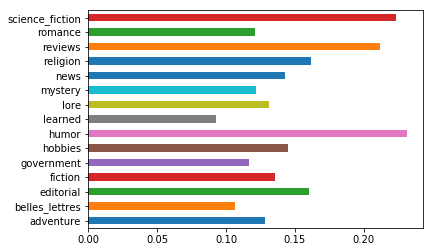

In [28]:
pd.Series(ttrs).plot(kind='barh')

##### findings
As we know, the higher the type/token ratio is, the lower the repetition rate of that text. <br>There is no surprising that ***learned*** is the last one, because in academic papers, certain specialized words are referred again and again.<br>
The ratios of ***reviews***, ***science_fiction*** and ***humor*** are really high, while the articles in these categories require various words to make description.

#### Collocations and/or frequent content n-grams for each. 

In [234]:
def getCollocations(tokens,window_size):
    text=nltk.Text(tokens)
    return text.collocation_list(window_size=window_size,num=10000)

In [235]:
collocations={}
for text in texts:
    collocations[text]=getCollocations(texts[text],2)

In [236]:
numOfNgrams=[len(collocations[category]) for category in collocations]

In [242]:
numDF=pd.DataFrame(numOfNgrams,index=labels,columns=['num'])

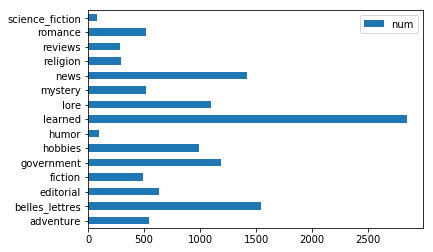

In [244]:
numDF.plot(kind='barh')

##### findings
I counted the number of collocations in each category. The result of each category varies a lot. ***learned*** ranks first and the collocation number of ***science_fiction*** and ***humor*** are quite small.

#### A pattern like 'like a JJ NN'.

In [85]:
def likeaJJNN(pairs):
    matches = []
    for i, pair in enumerate(pairs): 
        word = pair[0]
        pos = pair[1]
        if i<len(pairs)-3:
            nextWord = pairs[i+1][0]
            nextNextWord = pairs[i+2][0]
            nextNextPOS = pairs[i+2][1]
            nextNextNextWord=pairs[i+3][0]
            nextNextNextPOS=pairs[i+3][1]
            if word == "like" and nextWord == "a" and nextNextPOS == 'JJ' and nextNextNextPOS=='NN': 
                matches.append([word, nextWord, nextNextWord,nextNextNextWord])
    return matches

In [86]:
likeaJJNNs={}
for text in texts:
    textTags=nltk.pos_tag(texts[text])
    likeaJJNNs[text]=likeaJJNN(textTags)

In [87]:
likeaJJNNs

{'adventure': [['like', 'a', 'hideous', 'devil'],
  ['like', 'a', 'rare', 'wine'],
  ['like', 'a', 'ski', 'jump'],
  ['like', 'a', 'timid', 'rooster'],
  ['like', 'a', 'morning-frightened', "sparrow's"]],
 'belles_lettres': [['like', 'a', 'young', 'prince'],
  ['like', 'a', 'visual', 'echo'],
  ['like', 'a', 'blown-up', 'paper'],
  ['like', 'a', 'well-fleshed', 'lay'],
  ['like', 'a', 'perfect', 'gentleman'],
  ['like', 'a', 'literary', 'movement']],
 'editorial': [['like', 'a', 'sizable', 'hunk']],
 'fiction': [['like', 'a', 'wild', 'tangle'],
  ['like', 'a', 'muffled', 'drum'],
  ['like', 'a', 'green-scaled', 'monster'],
  ['like', 'a', 'headless', 'creature'],
  ['like', 'a', 'punctured', 'bolster'],
  ['like', 'a', 'physical', 'pain'],
  ['like', 'a', 'weary', 'hound'],
  ['like', 'a', 'primeval', 'memory'],
  ['like', 'a', 'mean', 'horse'],
  ['like', 'a', 'blind', 'man']],
 'government': [],
 'hobbies': [['like', 'a', 'large', 'pear'],
  ['like', 'a', 'real', 'orchestra'],
  ['li

#### words/POSes appear more often in each category

In [95]:
noStopTexts={}
for text in texts:
    words=[word.lower() for word in texts[text]]
    noStopTexts[text]=[word for word in words if word.isalpha() and word not in stopwords.words('english')]

In [96]:
mostCommons={}
for text in noStopTexts:
    res={}
    word=noStopTexts[text]
    res['most common words']=collections.Counter(word).most_common(5)
    POSes=[tag[1] for tag in nltk.pos_tag(word)]
    res['most common POSes']=collections.Counter(POSes).most_common(5)
    mostCommons[text]=res

In [97]:
mostCommons

{'adventure': {'most common words': [('said', 288),
   ('would', 194),
   ('one', 183),
   ('back', 166),
   ('man', 166)],
  'most common POSes': [('NN', 9093),
   ('JJ', 4787),
   ('VBD', 3307),
   ('NNS', 2398),
   ('RB', 2271)]},
 'belles_lettres': {'most common words': [('one', 550),
   ('would', 397),
   ('new', 278),
   ('time', 231),
   ('man', 231)],
  'most common POSes': [('NN', 24658),
   ('JJ', 15738),
   ('NNS', 8524),
   ('RB', 5220),
   ('VBD', 4715)]},
 'editorial': {'most common words': [('would', 185),
   ('one', 173),
   ('new', 134),
   ('united', 82),
   ('may', 79)],
  'most common POSes': [('NN', 9184),
   ('JJ', 5732),
   ('NNS', 3346),
   ('RB', 1789),
   ('VBD', 1325)]},
 'fiction': {'most common words': [('would', 291),
   ('said', 194),
   ('one', 184),
   ('could', 168),
   ('like', 151)],
  'most common POSes': [('NN', 9079),
   ('JJ', 4978),
   ('VBD', 2916),
   ('NNS', 2529),
   ('RB', 2031)]},
 'government': {'most common words': [('state', 196),
   ('

### 3. Complete ONE of the following mini-projects. 

**For each, please write at least one paragraph where you describe and explain your results in terms of the text(s) you're studying.**

1. Topic-model your corpus using LDA. What do you notice? Create a visualization of it, if you want. 
2. Explore the differences between quoted and non-quoted text in either _The Moonstone_ or in Mansfield's stories. What kinds of words/POSes appear more often in each category? Use any techniques we've learned so far. 
3. Explore the Brown Corpus, by category. What kinds of words/POSes appear more often in each category? Create a visualization or two of your explorations. 
4. Conduct a comparative stylometric analysis of a corpus of your choosing, using PCA. (Maybe the Brown Corpus, Inaugural Address Corpus, or a corpus of chapters in _The Moonstone_. According to your PCA output, which are the outliers (the most statistically dissimilar from the others)? Which are the most similar to each other? Why do you think this is? 
5. Make a simple genre categorizer that tries to guess the genre of a text, based on word frequencies derived from the Brown corpus. Test it on a few texts, like Mansfield's stories. 

#### 5. A simply genre categorize

In [135]:
rawTexts=[brown.raw(categories=category) for category in brown.categories()]

In [136]:
tfidf = TfidfVectorizer(tokenizer=nltk.word_tokenize, max_features=400)

In [137]:
tfMatrix=tfidf.fit_transform(rawTexts)

In [138]:
labels

['adventure',
 'belles_lettres',
 'editorial',
 'fiction',
 'government',
 'hobbies',
 'humor',
 'learned',
 'lore',
 'mystery',
 'news',
 'religion',
 'reviews',
 'romance',
 'science_fiction']

In [139]:
wordLabels=tfidf.get_feature_names()

In [ ]:
[collections.Counter(brown.words(categories=category)).most_common(20) for category in brown.categories()] 

In [188]:
df = pd.DataFrame(tfMatrix.todense(), index=labels, columns=wordLabels)

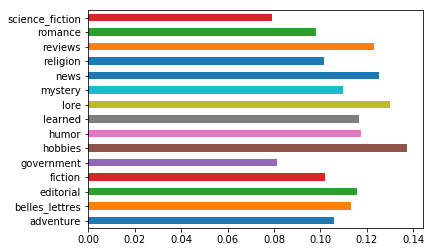

In [199]:
df['a/at'].plot(kind='barh')

In [207]:
def meanAPerCategory(category):
    return df[df.index.str.contains(category)]['a/at'].mean()

In [208]:
means=[meanAnPerCategory(label) for label in labels]

In [209]:
def guessCategory(freqAn):
    diffs=[abs(mean-freqAn) for mean in means]
    indexOfMin=diffs.index(min(diffs))
    return labels[indexOfMin]

##### test on Mansfield's stories.

In [210]:
def freqAListOfMansfield():
    mansfield=open('garden-party.md').read()
    stories=mansfield.split('\n# ')
    labels=[story.split('\n\n')[0] for story in stories]
    wordLabels = tfidf.get_feature_names()
    tfMatrix = tfidf.fit_transform(stories)
    df = pd.DataFrame(tfMatrix.todense(), index=labels,columns=wordLabels)
    
    result={}
    for label in labels:
        result[label]=df[df.index.str.contains(label)]['a'].mean()
    return result

In [211]:
freqAListOfMansfield()

{'# 1. AT THE BAY.\n## Chapter 1.I.': 0.18172380722544854,
 '2. THE GARDEN PARTY.': 0.1345576973496949,
 '3. THE DAUGHTERS OF THE LATE COLONEL.': 0.1277471298366955,
 '4. MR. AND MRS. DOVE.': 0.0948180626496792,
 '5. THE YOUNG GIRL.': 0.16260304234119455,
 '6. LIFE OF MA PARKER.': 0.1938412358764289,
 '7. MARRIAGE A LA MODE.': 0.14588301605207152,
 '8. THE VOYAGE.': 0.19882225762251168,
 '9. MISS BRILL.': 0.18134162144304042,
 '10. HER FIRST BALL.': 0.1344147088913249,
 '11. THE SINGING LESSON.': 0.13456880135577357,
 '12. THE STRANGER': 0.10083617202898489,
 '13. BANK HOLIDAY.': 0.3206349926283999,
 '14. AN IDEAL FAMILY.': 0.10815925542957351,
 "15. The Lady's Maid": 0.12453860901214696}

In [214]:
categoryOfMansfiled={}
freqAListOfMansfield=freqAListOfMansfield()
for story in freqAListOfMansfield:
    categoryOfMansfiled[story]= guessCategory(freqAListOfMansfield[story])

In [215]:
categoryOfMansfiled

{'# 1. AT THE BAY.\n## Chapter 1.I.': 'hobbies',
 '2. THE GARDEN PARTY.': 'hobbies',
 '3. THE DAUGHTERS OF THE LATE COLONEL.': 'lore',
 '4. MR. AND MRS. DOVE.': 'romance',
 '5. THE YOUNG GIRL.': 'hobbies',
 '6. LIFE OF MA PARKER.': 'hobbies',
 '7. MARRIAGE A LA MODE.': 'hobbies',
 '8. THE VOYAGE.': 'hobbies',
 '9. MISS BRILL.': 'hobbies',
 '10. HER FIRST BALL.': 'hobbies',
 '11. THE SINGING LESSON.': 'hobbies',
 '12. THE STRANGER': 'religion',
 '13. BANK HOLIDAY.': 'hobbies',
 '14. AN IDEAL FAMILY.': 'mystery',
 "15. The Lady's Maid": 'news'}

##### findings
I'm surprised at the result because it seems different from their actual category.<br>
The above result comes from using the word ***a*** as a metric, while the result will be totally different if I choose another word as a metric. So maybe the simply genre categorize is not accurate or it's very important to choose the right metric.